# Step-by-Step Guide für die Erkennung handgeschriebener Zahlen MNIST

In [1]:
%matplotlib inline

Dieser sog. 'magische Befehl' ermöglicht es, alle Plots innerhalb dieses Skripts anzuzeigen (im Browser)

### Importieren aller benötigten Pakete

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist # dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils

C:\Users\michael.aringer\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Make sure that the results are reproducable
np.random.seed(5)

### Zugriff auf Datensatz und Exploration

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
type(x_train) # check the type

numpy.ndarray

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

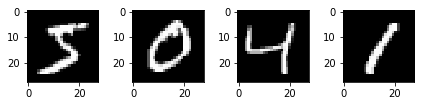

In [8]:
# plot 4 images as gray scale
for i in range(1,5):
    plt.subplot(1,4,i) # creates subplot-grid with 1 row, 4 columns (1st element)
    plt.imshow(x_train[i-1], cmap=plt.get_cmap('gray'))
plt.tight_layout()
plt.show()

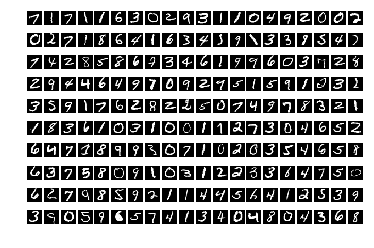

In [9]:
# show 200 images as gray scale (1st - 201st image)
for i in range(1,201):
    plt.subplot(10,20,i)
    plt.imshow(x_train[100+i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
#plt.subplots_adjust(hspace=0)
plt.show()

In [10]:
image = x_train[0, 0:] # select the first image of the training-set
#(every row represents an image and the 0th column stores the label)
np.set_printoptions(linewidth=150)
display(image) #display the numpy array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

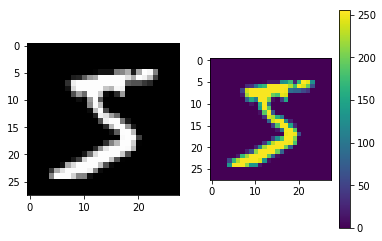

In [11]:
image = image.reshape(28, 28) # reshapes the image vector
plt.subplot (1, 2, 1)
plt.imshow(image, cmap='gray') # plots the image in black and white
plt.subplot (1, 2, 2)
plt.imshow(image) # plots the image with the default colormap (LUT=LookUpTable)
plt.colorbar()
plt.show()

### Umformen, Encoding und Normalisierung

In [12]:
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

784

In [13]:
x_train.shape # numpy-array

(60000, 28, 28)

In [14]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
# reshape the data in order to fit into the required format array consisting of [samples][pixels]
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [16]:
# one-hot encoding of the class values (outputs)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [17]:
print(y_test[200, 0:10]) # the 200th image is a 3

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [18]:
# normalize input values to be [0-1] the grey-scale uses values between [0-255]
x_train = x_train/255
x_test = x_test/255

# MLP Modell

### Model Initialisieren

In [19]:
mlp = Sequential()
mlp.add(Dense(784, input_dim = 784, activation = 'relu'))
# (fully-connected) NN-Layer mit 784 hidden Units für 784 Pixel
mlp.add(Dense(10, activation = 'softmax'))
# 10 Klassen für die Ziffern 0-9 mit Softmax Classifier

### Model Kompilieren

In [20]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Standardwerte des Adam-Optimizers: learning-rate=0.001, momentum=0.9

### Training

In [21]:
history_mlp = mlp.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.2753 - acc: 0.9213 - val_loss: 0.1415 - val_acc: 0.9571
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1108 - acc: 0.9682 - val_loss: 0.0970 - val_acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0713 - acc: 0.9793 - val_loss: 0.0802 - val_acc: 0.9749
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0502 - acc: 0.9856 - val_loss: 0.0683 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0366 - acc: 0.9899 - val_loss: 0.0615 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0269 - acc: 0.9924 - val_loss: 0.0586 - val_acc: 0.9817
Epoch 7/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0204 - acc: 0.9951 - val_loss: 0.0636 - 

In [22]:
history_mlp.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [23]:
history_mlp.history.items() #print all values out of the history of the model

dict_items([('val_loss', [0.14153949901461602, 0.09702297127805651, 0.08022554721683264, 0.06830656212521717, 0.06148877531173639, 0.05863677095738239, 0.06357767475943547, 0.06080585245101247, 0.06000913676005439, 0.06085484260809608]), ('val_acc', [0.9571000039577484, 0.9698000013828277, 0.9749000060558319, 0.9780000030994416, 0.9811000084877014, 0.9817000091075897, 0.9807000112533569, 0.9807000088691712, 0.9813000071048736, 0.9813000082969665]), ('loss', [0.27534230242172875, 0.11075276419520379, 0.0713354808712999, 0.050187159062673646, 0.036642981860786676, 0.02687011327284078, 0.0203561419636632, 0.014642140429932624, 0.010336125777491057, 0.008199062085089585]), ('acc', [0.9212666652848324, 0.968200002113978, 0.9793000127871831, 0.9856000119447708, 0.9898500094811121, 0.9924000072479248, 0.9950500047206878, 0.9964500033855438, 0.9979500019550324, 0.9983666682243347])])

### Model Evaluation

In [24]:
print("MLP-Training-Error: %.2f%%" % ((1-history_mlp.history['acc'][3])*100))

MLP-Training-Error: 1.44%


In [25]:
scores_mlp = mlp.evaluate(x_test, y_test, verbose=1)
print("MLP Error: %.2f%%" % (100-scores_mlp[1]*100))

10000/10000 [==============================] - 1s 79us/step
MLP Error: 1.87%


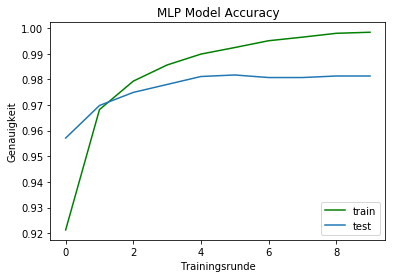

In [26]:
# plot model accuracy
plt.plot(history_mlp.history['acc'], 'g-')
plt.plot(history_mlp.history['val_acc'])
plt.title('MLP Model Accuracy')
plt.ylabel('Genauigkeit')
plt.xlabel('Trainingsrunde')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

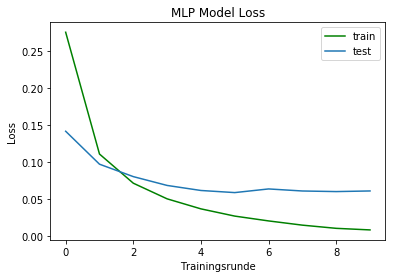

In [27]:
# plot model loss
plt.plot(history_mlp.history['loss'], 'g-')
plt.plot(history_mlp.history['val_loss'])
plt.title('MLP Model Loss')
plt.ylabel('Loss')
plt.xlabel('Trainingsrunde')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Vorhersage neuer Daten

In [28]:
#classes = model.predict(x_test, batch_size=10)

# CNN Modell

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# reshape training data to be [samples][width][height][pixels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# one hot encoding of the labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# normalizing input values to be in [0-1]
x_train = x_train/255
x_test = x_test/255

### Initialisieren & Kompilieren

In [30]:
cnn = Sequential()
cnn.add(Conv2D(32, 5, input_shape=(28, 28, 1), activation='relu'))
# 2-dim. convolution with 32 feature maps of size 5x5 with the ReLU activation function
# the input are images stored as numpy-arrays of the structure [pixels][width][heigth]
cnn.add(MaxPool2D(2)) # max-pooling with 2x2
cnn.add(Flatten()) #cnn.add(Dropout(0.2)) # regularization using dropout by randomly excluding 20% of the neurons
cnn.add(Dense(128, activation='relu')) # fc-layer with 128 hidden units
cnn.add(Dense(10, activation='softmax')) # last fc-layer with 10 neurons and softmax activation

# Compile model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training & Evaluation

In [31]:
history_cnn = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.2450 - acc: 0.9310 - val_loss: 0.0793 - val_acc: 0.9764
Epoch 2/10
60000/60000 [==============================] - 37s 613us/step - loss: 0.0680 - acc: 0.9808 - val_loss: 0.0527 - val_acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 35s 584us/step - loss: 0.0460 - acc: 0.9862 - val_loss: 0.0455 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 36s 603us/step - loss: 0.0357 - acc: 0.9894 - val_loss: 0.0451 - val_acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.0290 - acc: 0.9913 - val_loss: 0.0477 - val_acc: 0.9852
Epoch 6/10
60000/60000 [==============================] - 36s 604us/step - loss: 0.0235 - acc: 0.9924 - val_loss: 0.0368 - val_acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 36s 604us/step - loss: 0.0176 - acc: 0.9948 - val_loss: 0.

In [32]:
print("CNN-Training-Error: %.2f%%" % ((1-history_cnn.history['acc'][3])*100))

CNN-Training-Error: 1.06%


In [33]:
scores_cnn = cnn.evaluate(x_test, y_test, verbose=1) # Model Evaluation
print("CNN Error: %.2f%%" % (100-scores_cnn[1]*100))

10000/10000 [==============================] - 2s 232us/step
CNN Error: 1.28%


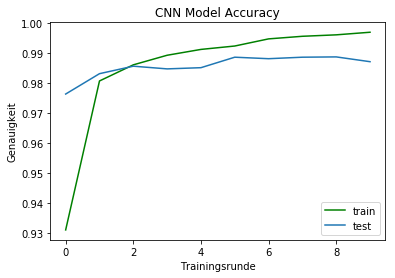

In [34]:
#generate plots
plt.plot(history_cnn.history['acc'], '-g')
plt.plot(history_cnn.history['val_acc'])
plt.title('CNN Model Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.xlabel('Trainingsrunde')
plt.ylabel('Genauigkeit')
plt.show()

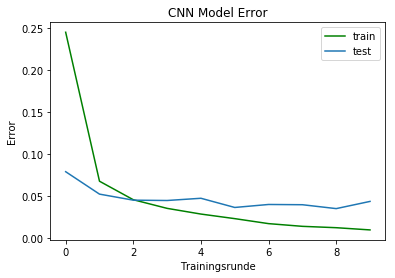

In [35]:
plt.plot(history_cnn.history['loss'], '-g')
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Error')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('Trainingsrunde')
plt.ylabel('Error')
plt.show()

# Optimiertes CNN Model

In [44]:
cnn_opt = Sequential()
cnn_opt.add(Conv2D(30, 5, input_shape=(28, 28, 1), activation='relu'))
cnn_opt.add(MaxPool2D(2))
cnn_opt.add(Conv2D(15, 3, activation='relu'))
cnn_opt.add(MaxPool2D(2))
cnn_opt.add(Dropout(0.2))
cnn_opt.add(Flatten())
cnn_opt.add(Dense(128, activation='relu'))
cnn_opt.add(Dense(64, activation='relu'))
cnn_opt.add(Dense(10, activation='softmax'))

cnn_opt.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn_opt = cnn_opt.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=200)

scores_cnn_opt = cnn_opt.evaluate(x_test, y_test, verbose=1)
print("Optimized CNN-Error: %.2f%%" % (100-scores_cnn_opt[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.3577 - acc: 0.8916 - val_loss: 0.0768 - val_acc: 0.9758
Epoch 2/10
60000/60000 [==============================] - 44s 729us/step - loss: 0.0925 - acc: 0.9713 - val_loss: 0.0470 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0671 - acc: 0.9790 - val_loss: 0.0442 - val_acc: 0.9849
Epoch 4/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.0543 - acc: 0.9830 - val_loss: 0.0373 - val_acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.0476 - acc: 0.9847 - val_loss: 0.0337 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.0404 - acc: 0.9870 - val_loss: 0.0303 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.0366 - acc: 0.9880 - val_loss: 0.

In [45]:
# Safe model to JSON
model_json = cnn_opt.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# Store weights to HDF5
cnn_opt.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk
